In [2]:
%matplotlib inline

import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import biosppy.signals.tools
import scipy.signal as sig

In [13]:
def sanitize(x):
    s = pd.Series(x)
    s.fillna(s.median(), inplace=True)
    return s.values

def normalize(x):
    return (x - x.min()) / ( x.max() - x.min())

def resample(data, old_fps, new_fps):
    new_size = new_fps * data.size / old_fps
    return sig.resample(data, int(new_size), window='blackmanharris')

def preprocess(x, old_fps=256):
    resampled = resample(normalize(sanitize(x)), old_fps, 60)
    return resampled[:60*100]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f637cc35b50>,
      dtype=object)

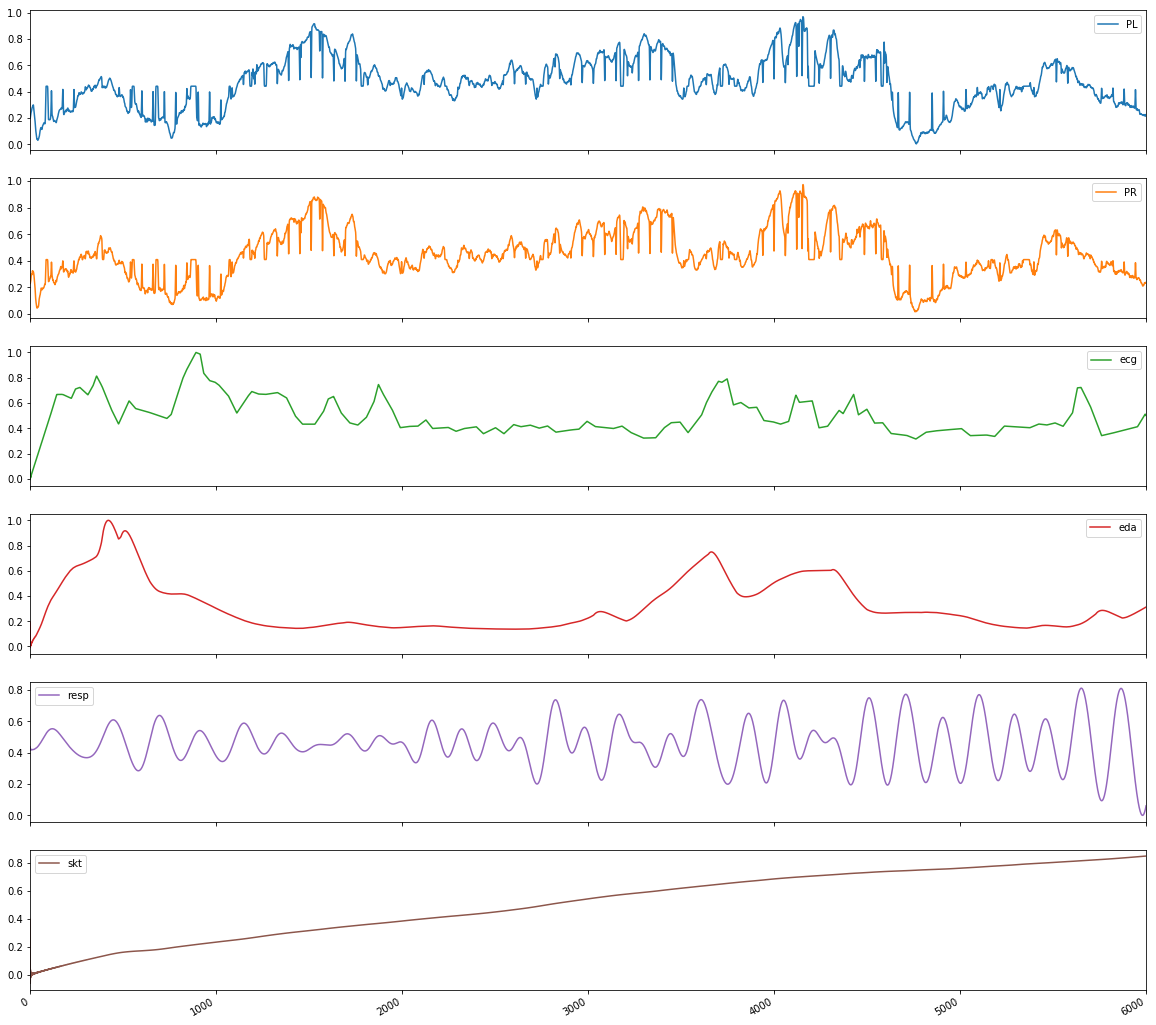

In [14]:
sid = 3138
f = map(np.load, glob.glob("../export/data/physio_data_{}_*.npz".format(sid)))[0]

sinfo = f["session_info"]
#ecg = f["ecg"]
#eda = f["eda"]
#skt = f["skt"]
#resp = f["resp"]
#pupil = f["pupil"]

data = { signal: preprocess(f[signal].tolist()['processed']) for signal in ['ecg', 'eda', 'skt', 'resp'] }
data["PL"] = preprocess(f["pupil"][0], old_fps=60)
data["PR"] = preprocess(f["pupil"][1], old_fps=60)
data = pd.DataFrame(data)
data.plot(figsize=(20,20), subplots=(2,3))